In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df1=pd.read_excel('flight_price.xlsx')
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:

##Handling Null values

In [4]:

df1.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [5]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
df1.drop(columns=['Route'],inplace=True,axis=1)

In [7]:
df1['Total_Stops'].mode()

,Total_Stops
0,1 stop


In [8]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df1['Total_Stops'].fillna('1 stop',inplace=True)

In [10]:
df1.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0
Price,0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10683 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


**Exploratory Analysis**


1)**Univariate Analysis**

<Axes: xlabel='Airline', ylabel='count'>

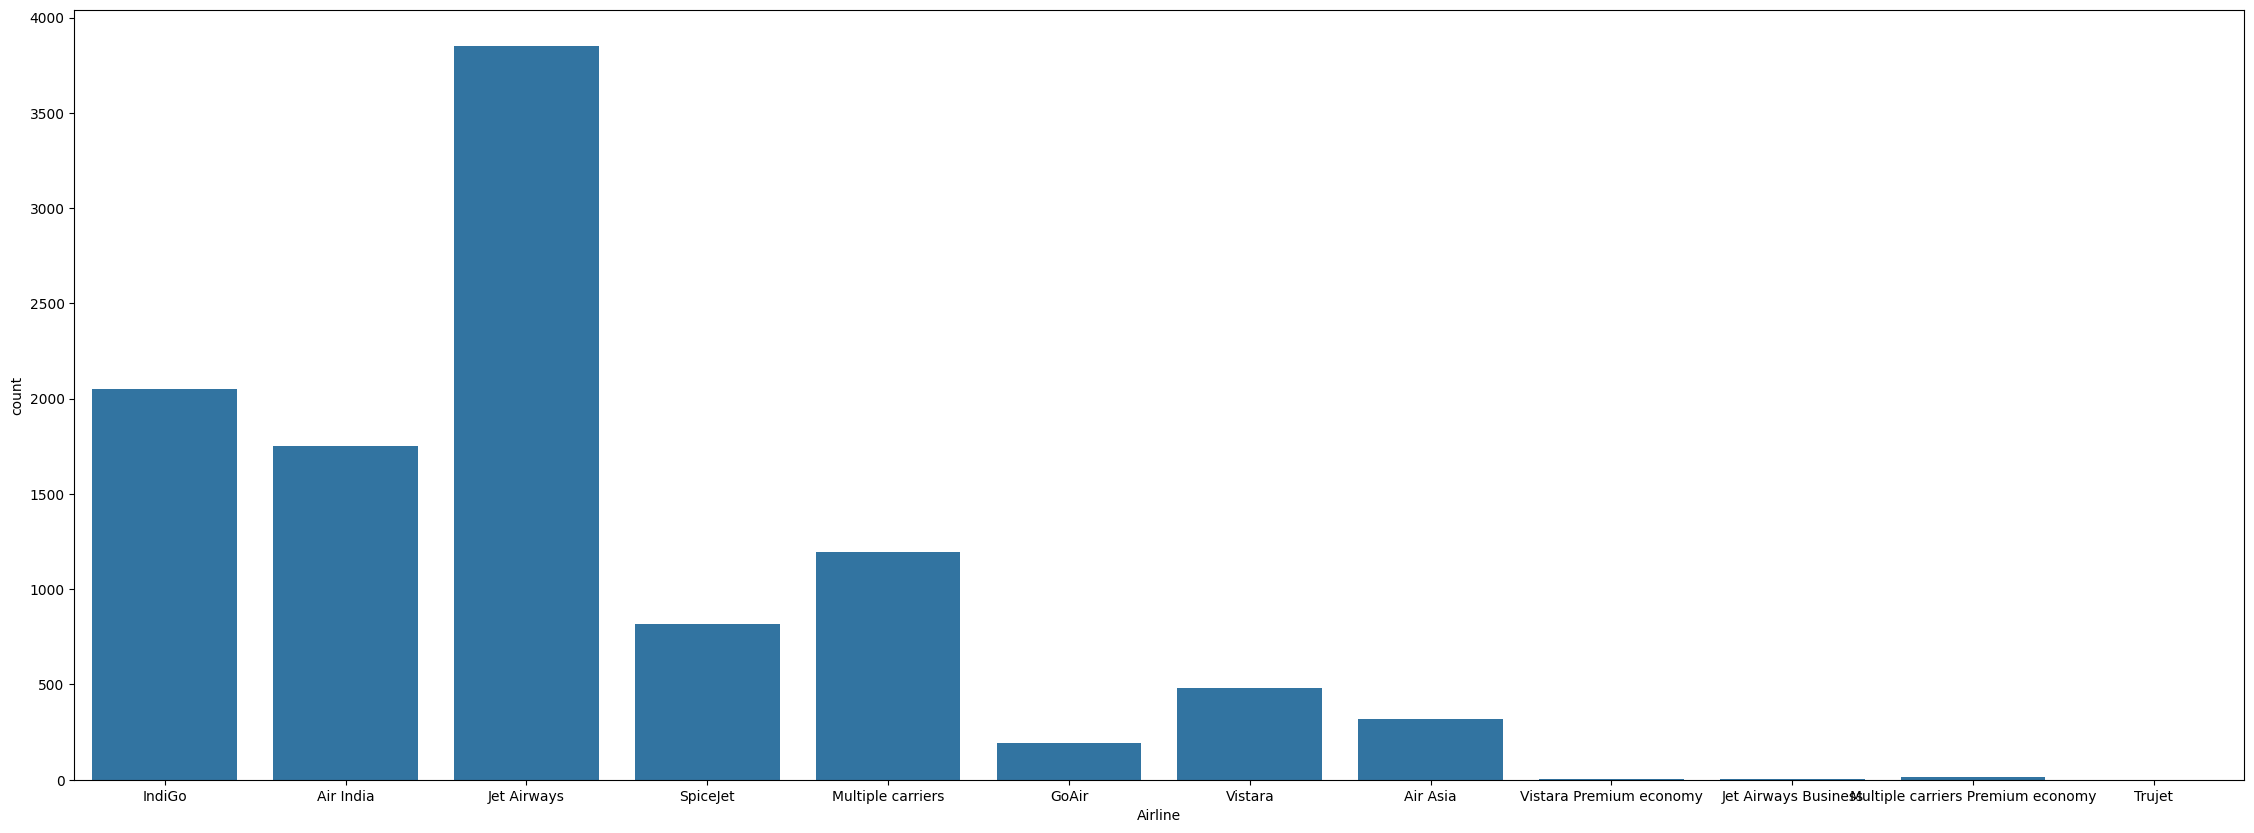

In [13]:
plt.figure(figsize=(28,10))

sns.countplot(x='Airline',data=df1)

<Axes: xlabel='Source', ylabel='count'>

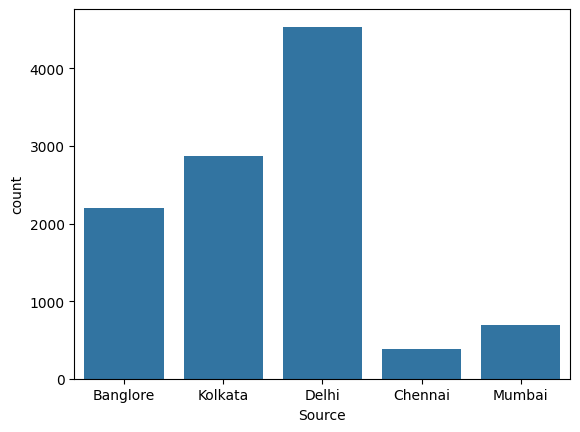

In [14]:
sns.countplot(x='Source',data=df1)

**Bivariate Analysis**


<Axes: xlabel='Airline', ylabel='Price'>

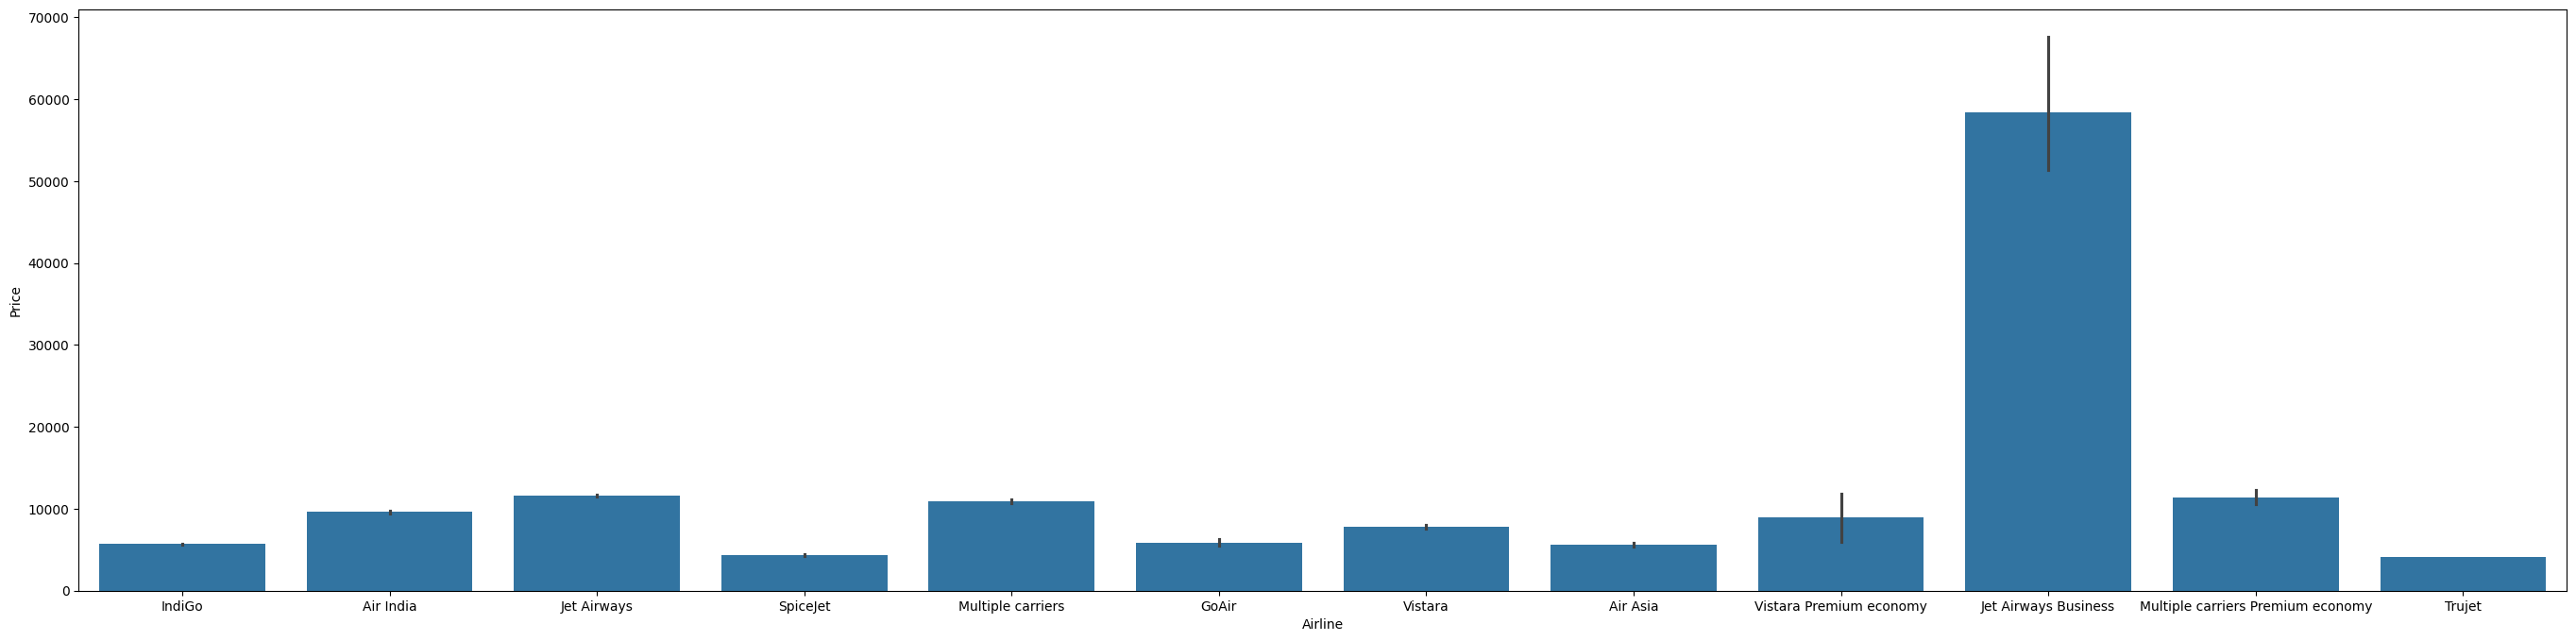

In [20]:
plt.figure(figsize=(34,8))
sns.barplot(x='Airline',y='Price',data=df1)

<Axes: xlabel='Source', ylabel='Price'>

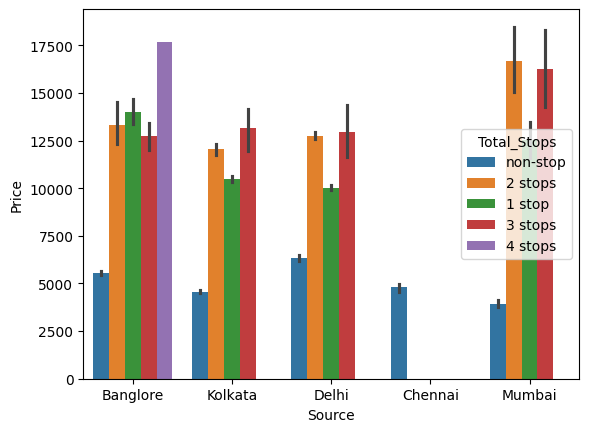

In [23]:
sns.barplot(x='Source',y='Price',data=df1, hue='Total_Stops')

In [25]:
pd.crosstab(df1['Airline'],df1['Total_Stops'])

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop
Airline,,,,,
Air Asia,129,9,0,0,181
Air India,541,756,37,1,417
GoAir,102,0,0,0,92
IndiGo,793,19,0,0,1241
Jet Airways,2535,691,0,0,623
Jet Airways Business,4,2,0,0,0
Multiple carriers,1145,43,8,0,0
Multiple carriers Premium economy,13,0,0,0,0
SpiceJet,148,0,0,0,670


<Axes: xlabel='Total_Stops', ylabel='Price'>

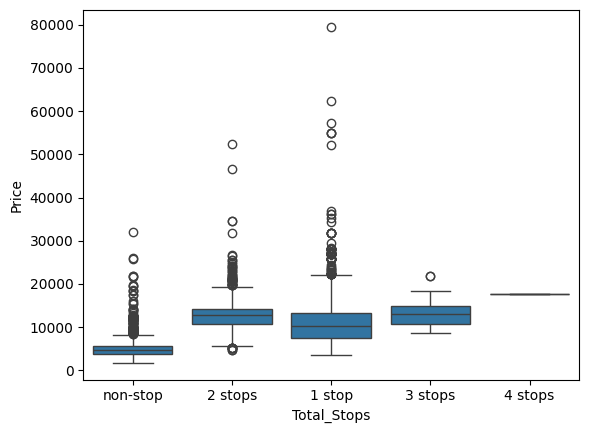

In [30]:
sns.boxplot(x='Total_Stops',y='Price',data=df1)

In [29]:
pd.crosstab(df1['Destination'],df1['Source'])

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Destination,,,,,
Banglore,0,0,0,2871,0
Cochin,0,0,4537,0,0
Delhi,1265,0,0,0,0
Hyderabad,0,0,0,0,697
Kolkata,0,381,0,0,0
New Delhi,932,0,0,0,0


**Feature Engineering and Data Conversion**

In [12]:
df1['Total_Stops']=df1['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [13]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302


In [14]:
#Splitting hour and min in duration
df1['Duration_hn_min']=df1['Duration'].str.split(' ').str[0].str.split('h').str[0].replace('5m',0).astype(int)
df1['Duration_min']=df1['Duration'].str.split(' ').str[1].str.split('m').str[0].fillna('0').astype(int)
df1['Total_duration_min']=df1['Duration_hn_min']*60+df1['Duration_min']

In [15]:
df1.drop('Duration',axis=1, inplace=True)

In [16]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hn_min,Duration_min,Total_duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,0,No info,3897,2,50,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2,No info,7662,7,25,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2,No info,13882,19,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1,No info,6218,5,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1,No info,13302,4,45,285


**Converting Arrival and Departure Times**

In [17]:
df1['Departure_hour']=df1['Dep_Time'].str.split(':').str[0].astype(int)
df1['Departure_min']=df1['Dep_Time'].str.split(':').str[1].astype(int)

In [18]:
#Splitting Arrival time and converting into minutes
df1['Arrival_Time_hour']=df1['Arrival_Time'].str.split(':').str[0].astype(int)
df1['Arrival_Time_min']=df1['Arrival_Time'].str.split(':').str[1].str.split(' ').str[0].astype(int)
df1['Total_Arrival_min']=df1['Arrival_Time_hour']*60+df1['Arrival_Time_min']

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10683 non-null  object
 1   Date_of_Journey     10683 non-null  object
 2   Source              10683 non-null  object
 3   Destination         10683 non-null  object
 4   Dep_Time            10683 non-null  object
 5   Arrival_Time        10683 non-null  object
 6   Total_Stops         10683 non-null  int64 
 7   Additional_Info     10683 non-null  object
 8   Price               10683 non-null  int64 
 9   Duration_hn_min     10683 non-null  int64 
 10  Duration_min        10683 non-null  int64 
 11  Total_duration_min  10683 non-null  int64 
 12  Departure_hour      10683 non-null  int64 
 13  Departure_min       10683 non-null  int64 
 14  Arrival_Time_hour   10683 non-null  int64 
 15  Arrival_Time_min    10683 non-null  int64 
 16  Total_Arrival_min   10

In [20]:
df1['Day']=df1['Date_of_Journey'].str.split('/').str[0].astype(int)
df1['Month']=df1['Date_of_Journey'].str.split('/').str[1].astype(int)
df1['Year']=df1['Date_of_Journey'].str.split('/').str[2].astype(int)
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'Duration_hn_min', 'Duration_min', 'Total_duration_min',
       'Departure_hour', 'Departure_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Total_Arrival_min', 'Day', 'Month', 'Year'],
      dtype='object')

In [21]:
df1.drop(columns=['Date_of_Journey','Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10683 non-null  object
 1   Source              10683 non-null  object
 2   Destination         10683 non-null  object
 3   Total_Stops         10683 non-null  int64 
 4   Additional_Info     10683 non-null  object
 5   Price               10683 non-null  int64 
 6   Duration_hn_min     10683 non-null  int64 
 7   Duration_min        10683 non-null  int64 
 8   Total_duration_min  10683 non-null  int64 
 9   Departure_hour      10683 non-null  int64 
 10  Departure_min       10683 non-null  int64 
 11  Arrival_Time_hour   10683 non-null  int64 
 12  Arrival_Time_min    10683 non-null  int64 
 13  Total_Arrival_min   10683 non-null  int64 
 14  Day                 10683 non-null  int64 
 15  Month               10683 non-null  int64 
 16  Year                10

In [23]:
df1['Source'].value_counts()

,count
Source,
Delhi,4537
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [24]:
from sklearn.preprocessing import OneHotEncoder
Encoder=OneHotEncoder()
Encoder.fit_transform(df1[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [25]:
df2=pd.DataFrame(Encoder.fit_transform(df1[['Airline','Source','Destination']]).toarray(),columns=Encoder.get_feature_names_out())
df2.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
DF=pd.concat([df1,df2],axis=1)
#displaying all columns
pd.set_option('display.max_columns', None)
DF.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Duration_hn_min,Duration_min,Total_duration_min,Departure_hour,Departure_min,Arrival_Time_hour,Arrival_Time_min,Total_Arrival_min,Day,Month,Year,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,No info,3897,2,50,170,22,20,1,10,70,24,3,2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,2,No info,7662,7,25,445,5,50,13,15,795,1,5,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2,No info,13882,19,0,1140,9,25,4,25,265,9,6,2019,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,25,325,18,5,23,30,1410,12,5,2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1,No info,13302,4,45,285,16,50,21,35,1295,1,3,2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='Airline', ylabel='Price'>

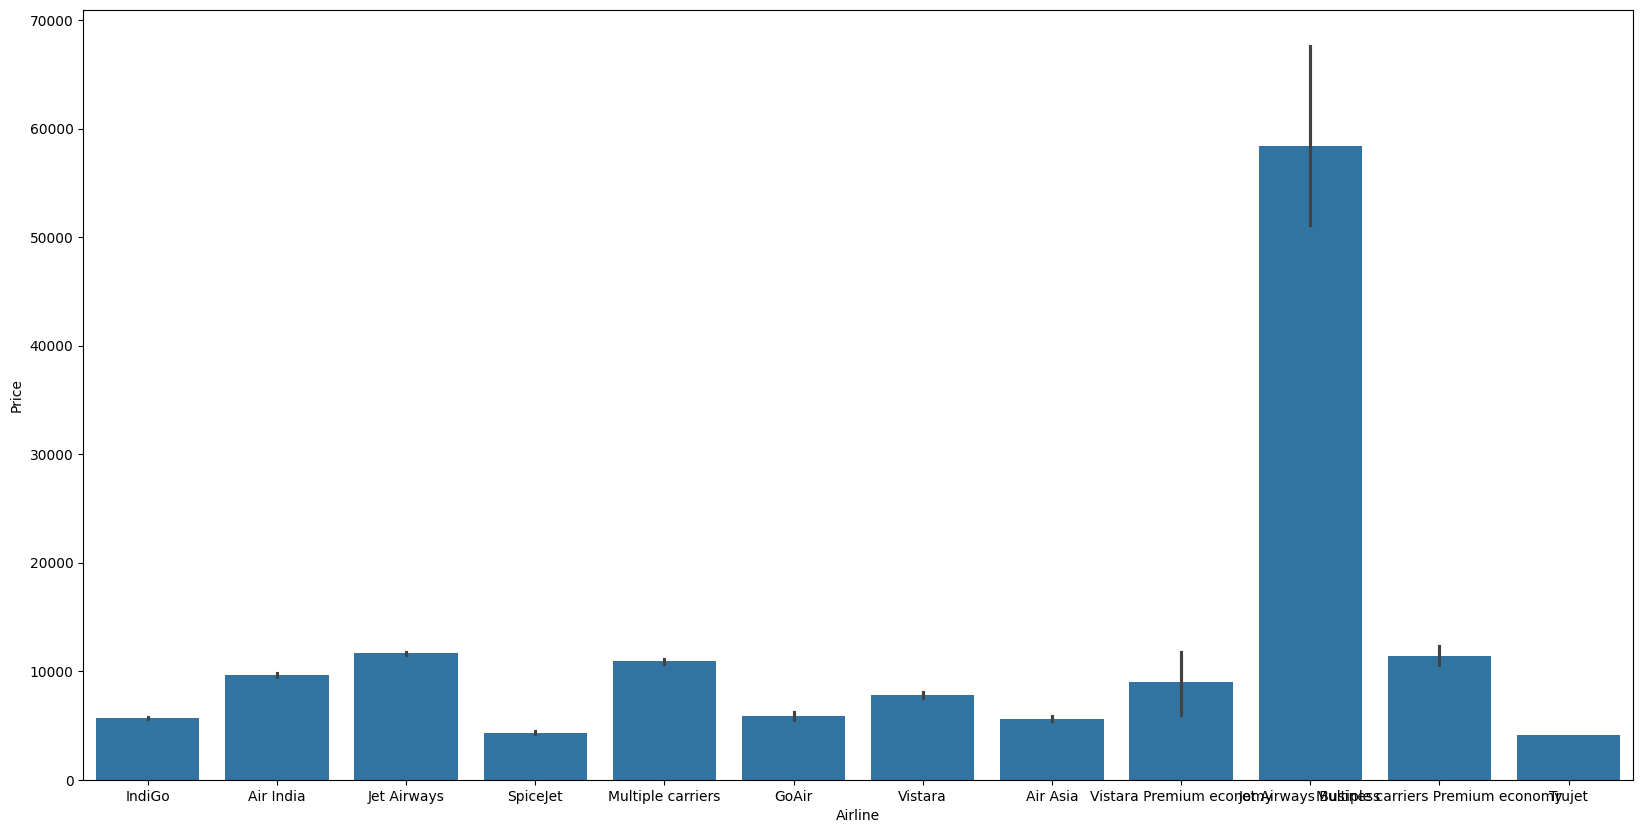

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x='Airline',y='Price',data=DF)

In [28]:
DF.groupby('Airline')['Price'].mean().sort_values(ascending=False)

,Price
Airline,
Jet Airways Business,58358.666667
Jet Airways,11643.923357
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9611.210616
Vistara Premium economy,8962.333333
Vistara,7796.348643
GoAir,5861.056701
IndiGo,5673.682903


In [29]:
DF.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Duration_hn_min', 'Duration_min', 'Total_duration_min',
       'Departure_hour', 'Departure_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Total_Arrival_min', 'Day', 'Month', 'Year',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [30]:
DF.drop(columns=['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

<Axes: xlabel='Total_Stops', ylabel='Price'>

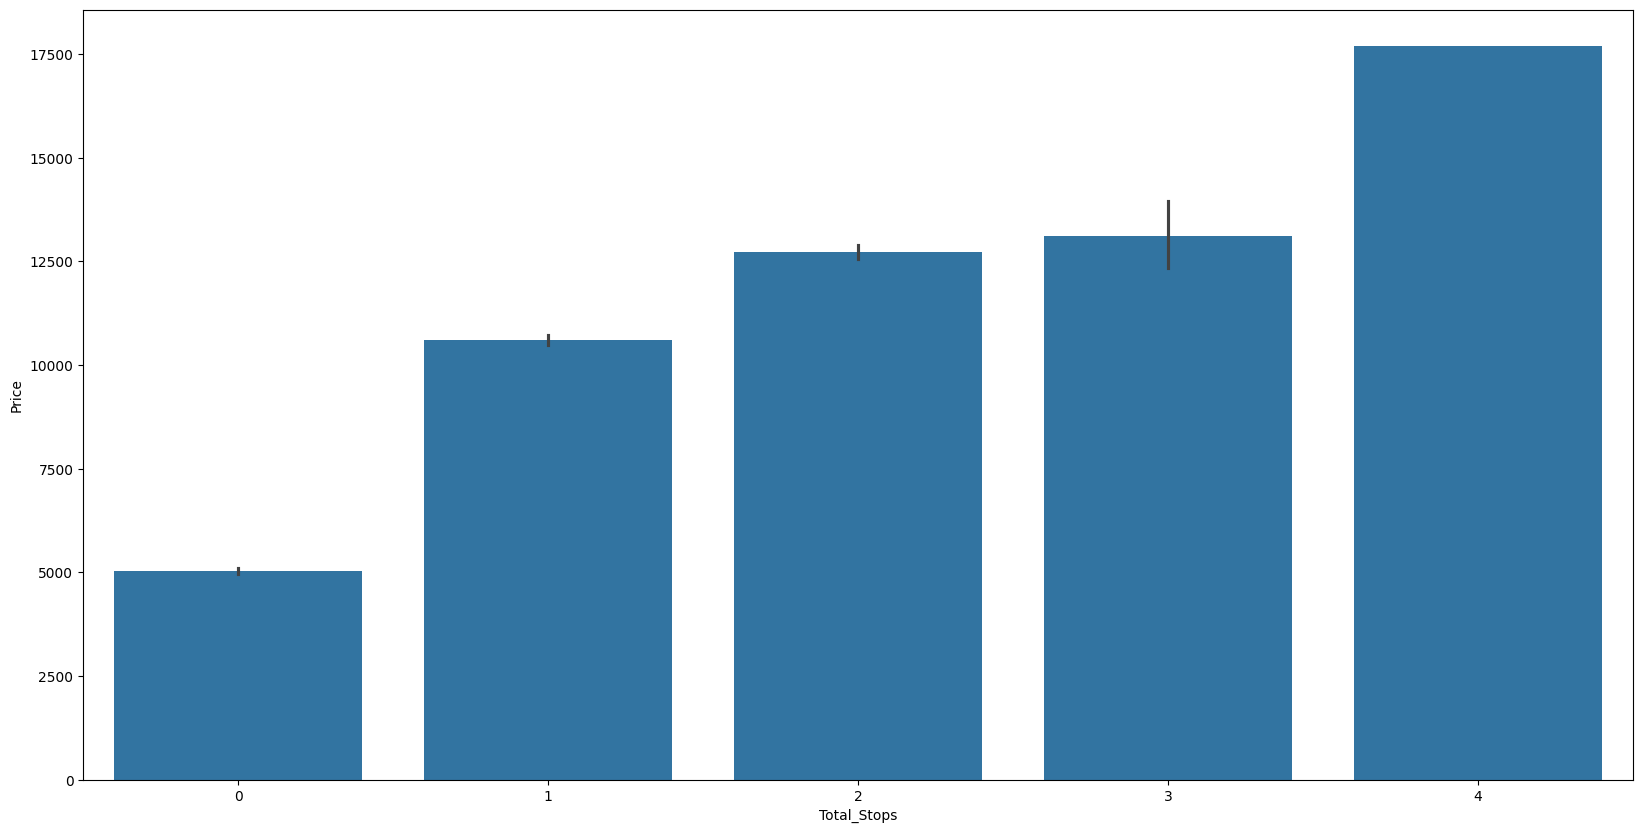

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x='Total_Stops',y='Price',data=DF)

In [32]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  int64  
 1   Price                                      10683 non-null  int64  
 2   Duration_hn_min                            10683 non-null  int64  
 3   Duration_min                               10683 non-null  int64  
 4   Total_duration_min                         10683 non-null  int64  
 5   Departure_hour                             10683 non-null  int64  
 6   Departure_min                              10683 non-null  int64  
 7   Arrival_Time_hour                          10683 non-null  int64  
 8   Arrival_Time_min                           10683 non-null  int64  
 9   Total_Arrival_min                          10683 non-null  int64  
 10  Day                   

<Axes: >

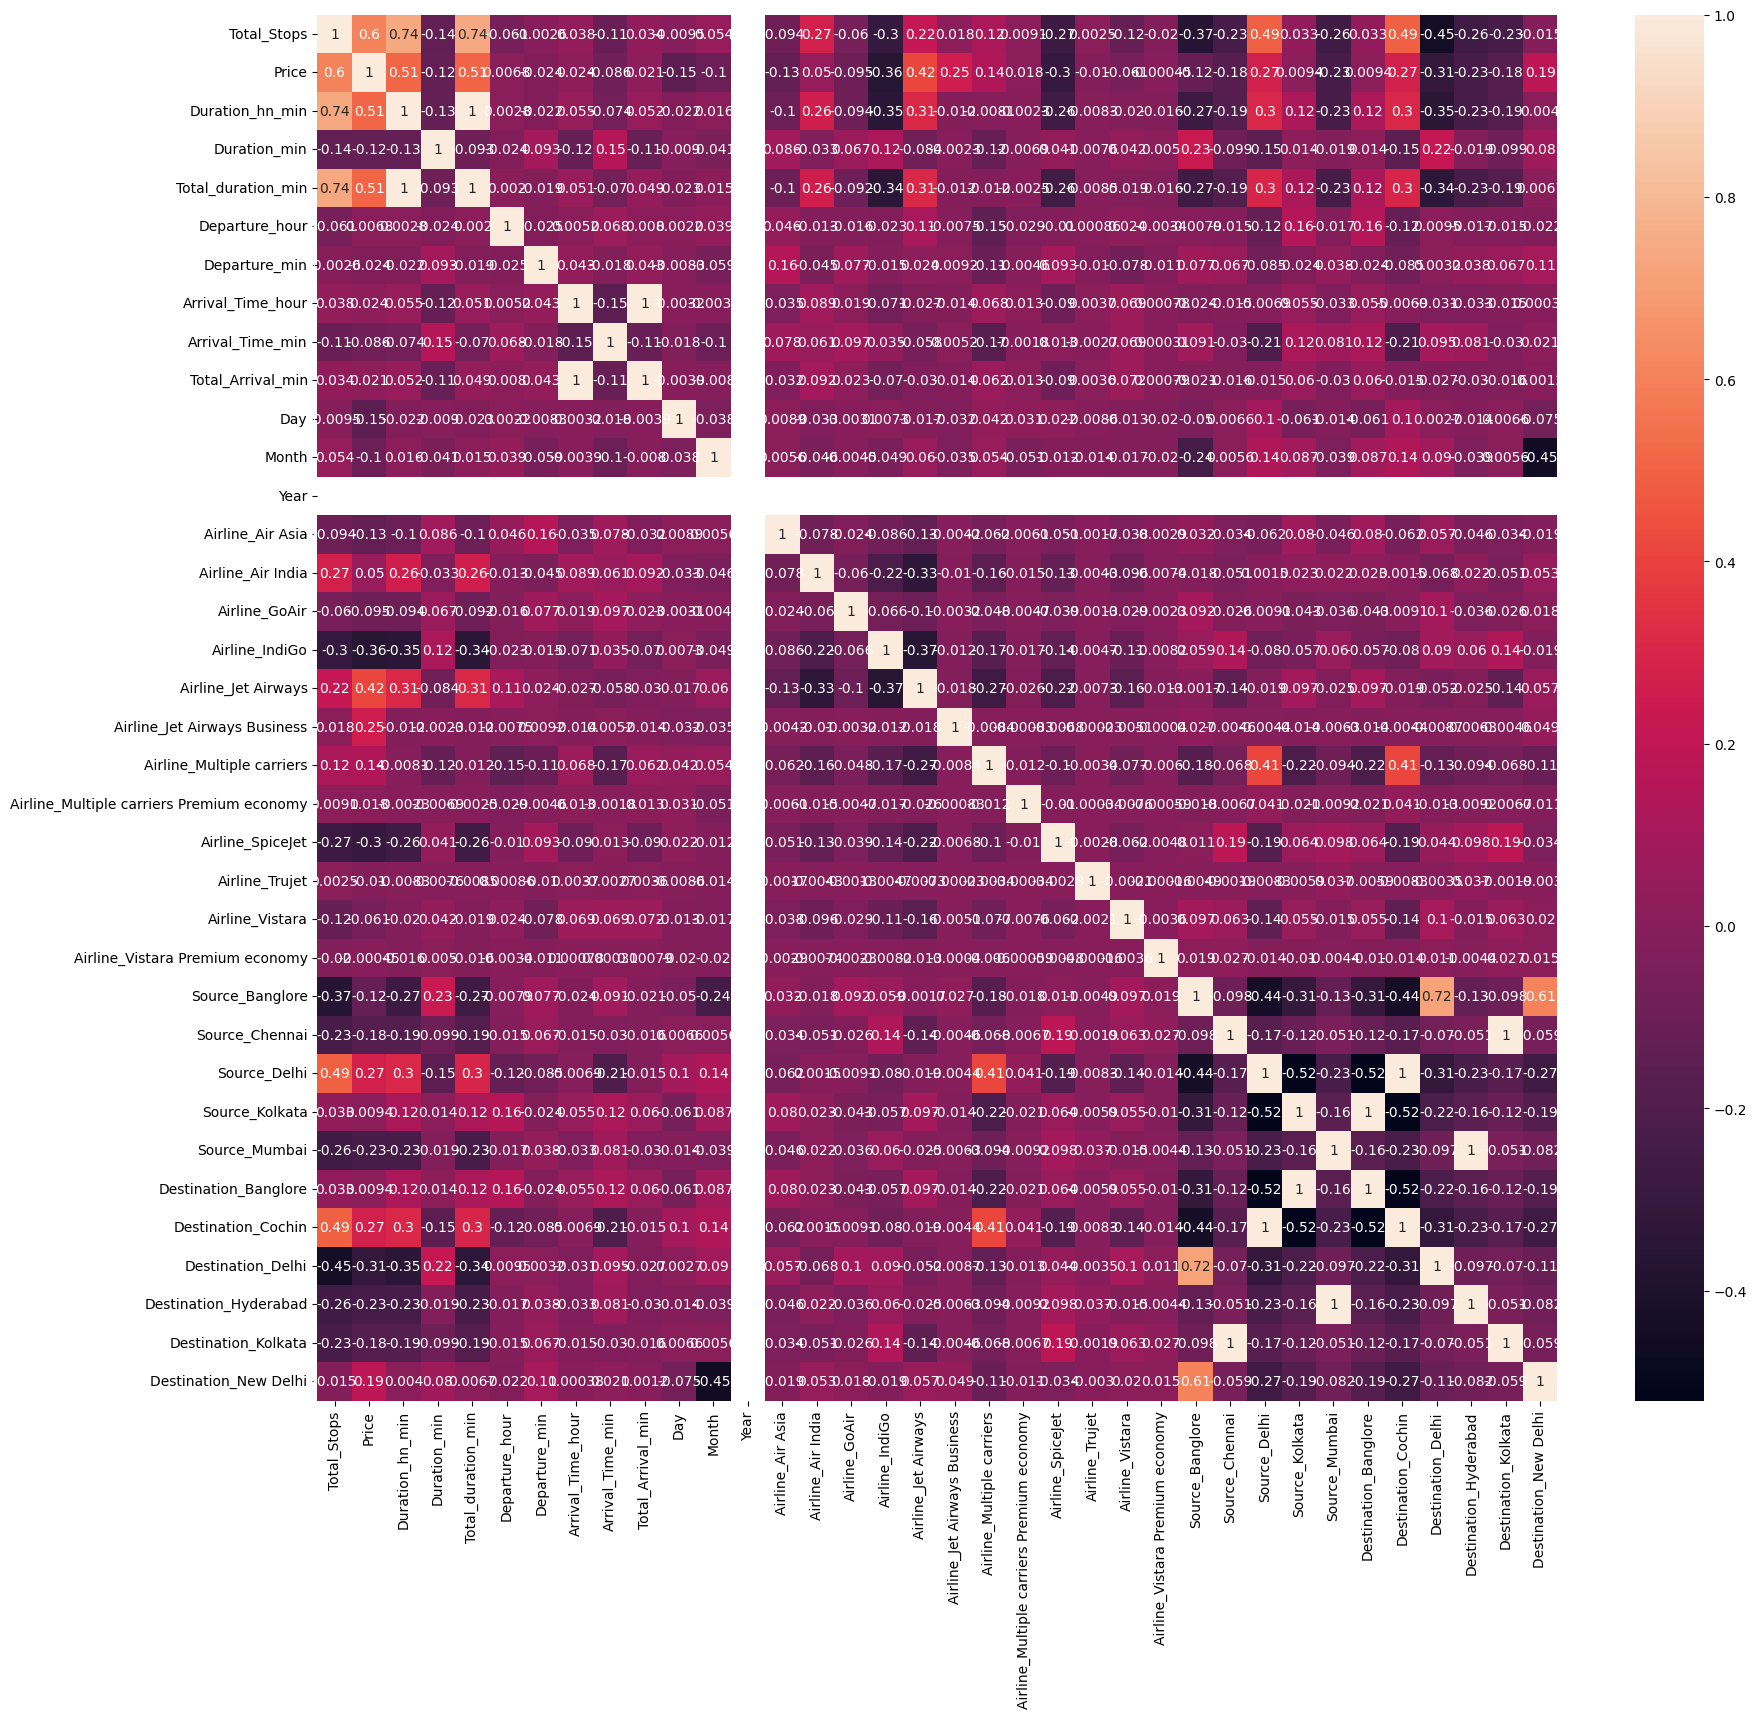

In [33]:
plt.figure(figsize=(20,18))
sns.heatmap(DF.corr(),annot=True)



In [35]:
DF.columns

Index(['Total_Stops', 'Price', 'Duration_hn_min', 'Duration_min',
       'Total_duration_min', 'Departure_hour', 'Departure_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Total_Arrival_min', 'Day',
       'Month', 'Year', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

<Axes: xlabel='Total_duration_min', ylabel='Price'>

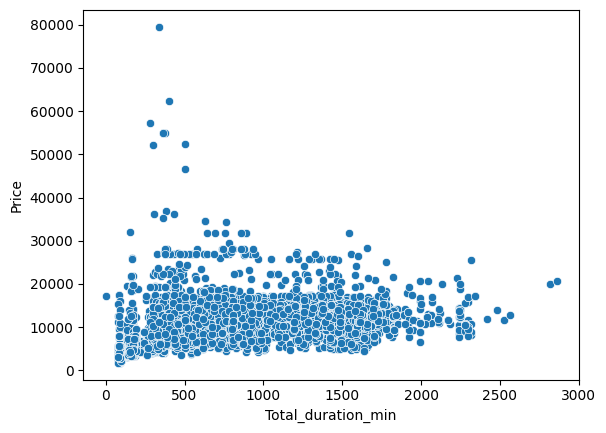

In [44]:
sns.scatterplot(x=DF['Total_duration_min'],y=DF['Price'])